<a href="https://colab.research.google.com/github/yonatan-tasfay/Campus_Network/blob/main/predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts
!pip install pyyaml==5.4.1
!pip install -U matplotlib

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)
from darts.metrics import mape,mase,coefficient_of_variation,mae,mse,ope
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
series_max = TimeSeries.from_csv("MaxTemp_data.csv",time_col="Date")
series_rainfall = TimeSeries.from_csv("Rainfall_data.csv",time_col="Date")
series_min = TimeSeries.from_csv("MinTemp_data.csv",time_col="Date")

series_max.plot(label="Max Temperature")
series_rainfall.plot(label="Rainfall Amount")
series_min.plot(label="Min Temperature")
plt.legend()

In [ ]:
scaler_max, scaler_rainfall,scaler_min = Scaler(), Scaler(),Scaler()
series_max_scaled = scaler_max.fit_transform(series_max)
series_min_scaled = scaler_min.fit_transform(series_min)
series_rainfall_scaled = scaler_rainfall.fit_transform(series_rainfall)

series_max_scaled.plot(label="Max Temperature")
series_rainfall_scaled.plot(label="Rainfall Amount")
series_min_scaled.plot(label="Min Temperature")
plt.legend()

In [7]:
train_rainfall, val_rainfall=series_rainfall_scaled.split_after(0.8)
train_max, val_max=series_max_scaled.split_after(0.8)
train_min, val_min=series_min_scaled.split_after(0.8)


In [37]:
model_nbeats = NBEATSModel (input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0)
model_blockrnn =BlockRNNModel(input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0)
model_tcn = TCNModel (input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0)
model_transformer = TransformerModel (input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0)

In [ ]:
model_nbeats.fit(train_rainfall, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 383it [00:00, ?it/s]

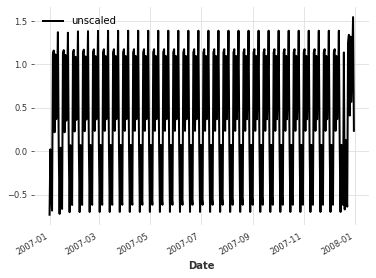

In [35]:
pred_scaled = model_nbeats.predict(n=365)
pred_unscaled=scaler_rainfall.inverse_transform(pred_scaled)
pred_unscaled.plot(label="unscaled")
#pred_scaled.plot(label="scaled")
plt.legend()


In [33]:
mase_score=mase(val_rainfall,pred_scaled,train_rainfall)
mape_score=mape(val_rainfall,pred_scaled)
coefficient_of_variation_score=coefficient_of_variation(val_rainfall,pred_scaled)
mae_score=mae(val_rainfall,pred_scaled)
mse_score=mse(val_rainfall,pred_scaled)
ope_score=ope(val_rainfall,pred_scaled)

print(mase_score)
print(mape_score)
print(coefficient_of_variation_score)
print(mae_score)
print(mse_score)
print(ope_score)

NameError: ignored